In [1]:
#https://app.sandbox.dea.ga.gov.au/user/erinestafford@gmail.com/lab/tree/DEA_products/DEA_Land_Cover.ipynb
import pandas as pd
#LEVEL3_COLOUR_SCHEME = {
#    0: (255, 255, 255, 255, "No Data"),
#    111: (172, 188, 45, 255, "Cultivated terrestrial vegetation"),
#    112: (14, 121, 18, 255, "Natural terrestrial vegetation"),
#    124: (30, 191, 121, 255, "Natural aquatic vegetation"),
#    215: (218, 92, 105, 255, "Artificial surface"),
#    216: (243, 171, 105, 255, "Natural bare surface"),
#    220: (77, 159, 220, 255, "Water"),
#}
df = pd.read_csv ('classification_data.csv')
print(df)

           time          y          x  spatial_ref  level3
0    2020-01-01 -3808500.0  1733500.0         3577     112
1    2020-01-01 -3808500.0  1734500.0         3577     112
2    2020-01-01 -3808500.0  1735500.0         3577     112
3    2020-01-01 -3808500.0  1736500.0         3577     112
4    2020-01-01 -3808500.0  1737500.0         3577     112
..          ...        ...        ...          ...     ...
478  2020-01-01 -3830500.0  1749500.0         3577     216
479  2020-01-01 -3830500.0  1750500.0         3577     216
480  2020-01-01 -3830500.0  1751500.0         3577     216
481  2020-01-01 -3830500.0  1752500.0         3577     216
482  2020-01-01 -3830500.0  1753500.0         3577     216

[483 rows x 5 columns]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
print(len(df.y.unique()))
print(len(df.x.unique()))
classes = df.level3.values.reshape((23,21))

23
21


In [4]:
np.shape(classes)

(23, 21)

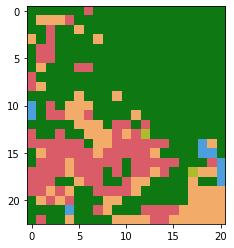

In [26]:

# define color map 
color_map = { 0: np.array([255, 255, 255]),
             111: np.array([172, 188, 45]),
             112: np.array([14, 121, 18]),
             124: np.array([30, 191, 121]),
             215: np.array([218, 92, 105]),
             216: np.array([243, 171, 105]),
             220: np.array([77, 159, 220]),
}

# make a 3d numpy array that has a color channel dimension 
data_3d = np.ndarray(shape=(classes.shape[0], classes.shape[1], 3), dtype=int)
for i in range(classes.shape[0]):
    for j in range(classes.shape[1]):
        data_3d[i][j] = color_map[classes[i][j]]

# display the plot 
fig, ax = plt.subplots()
ax.imshow(data_3d)

plt.show()



In [7]:
xc = int(np.shape(classes)[0]/2)
yc = int(np.shape(classes)[1]/2)
classes[xc,yc]

112

In [33]:
# make patch network based on classification 
#LEVEL3_COLOUR_SCHEME = {
#    0: (255, 255, 255, 255, "No Data"),
#    111: (172, 188, 45, 255, "Cultivated terrestrial vegetation"),
#    112: (14, 121, 18, 255, "Natural terrestrial vegetation"),
#    124: (30, 191, 121, 255, "Natural aquatic vegetation"),
#    215: (218, 92, 105, 255, "Artificial surface"),
#    216: (243, 171, 105, 255, "Natural bare surface"),
#    220: (77, 159, 220, 255, "Water"),
#}
patch_net = {}
patch_names = []
count = 0
for i in range(classes.shape[0]):
    for j in range(classes.shape[1]):
        patch_net[count] ={}
        patch_net[count]['patch_center']= [i+0.5,j+0.5]
        patch_net[count]['Res']=np.array([0.5,0.5])
        if classes[i][j]== 111: #"Cultivated terrestrial vegetation"
            K = np.random.choice(np.arange(200,1000))
            patch_net[count]['carrying_capacity']= K*350
            patch_net[count]['init_resources']= np.random.choice(np.arange(350,K*350))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0.05,0.1,0.001))
            patch_net[count]['Name'] = 'Orchard'
        elif classes[i][j]== 112: #"Natural terrestrial vegetation"
            K = np.random.choice(np.arange(200,2000))
            patch_net[count]['carrying_capacity']= K*350
            patch_net[count]['init_resources']= np.random.choice(np.arange(350,K*350))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0,0.1,0.001))
            patch_net[count]['Name'] = 'Forest'
        elif classes[i][j]== 124: #"Natural aquatic vegetation"
            K = np.random.choice(np.arange(200,3000))
            patch_net[count]['carrying_capacity']= K*350
            patch_net[count]['init_resources']= np.random.choice(np.arange(350,K*350))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0,0.1,0.001))
            patch_net[count]['Name'] ='Water Body'
        elif classes[i][j]== 215: #"Artificial surface"
            K = np.random.choice(np.arange(200,1000))
            patch_net[count]['carrying_capacity']= K*350
            patch_net[count]['init_resources']= np.random.choice(np.arange(350,K*350))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0.1,0.5,0.001))
            patch_net[count]['Name'] ='Residential'
        elif classes[i][j]== 216: #"Natural bare surface"
            K = np.random.choice(np.arange(200,1000))
            patch_net[count]['carrying_capacity']= K*350
            patch_net[count]['init_resources']= np.random.choice(np.arange(350,K*350))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0.1,0.5,0.001))
            patch_net[count]['Name'] ='Dump'
        elif classes[i][j]== 220: #"Water"
            K = np.random.choice(np.arange(200,3000))
            patch_net[count]['carrying_capacity']= K*350
            patch_net[count]['init_resources']= np.random.choice(np.arange(350,K*350))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0,0.1,0.001))
            patch_net[count]['Name'] ='Water Body'
        else: #No Data
            patch_net[count]['carrying_capacity']=1
            patch_net[count]['init_resources']= 0
            patch_net[count]['resource_birth'] = 0
            patch_net[count]['Res']=np.array([0,0])
            
        if i == xc and j ==yc:
            patch_net[count]['Name'] ='Roost'
            print(count)
        patch_names.append(patch_net[count]['Name'])
        count = count + 1

241


In [34]:
patch_net

{0: {'patch_center': [0.5, 0.5],
  'Res': array([0.5, 0.5]),
  'carrying_capacity': 214900,
  'init_resources': 194716,
  'resource_birth': 0.029,
  'Name': 'Forest'},
 1: {'patch_center': [0.5, 1.5],
  'Res': array([0.5, 0.5]),
  'carrying_capacity': 454650,
  'init_resources': 423099,
  'resource_birth': 0.05,
  'Name': 'Forest'},
 2: {'patch_center': [0.5, 2.5],
  'Res': array([0.5, 0.5]),
  'carrying_capacity': 370650,
  'init_resources': 246759,
  'resource_birth': 0.048,
  'Name': 'Forest'},
 3: {'patch_center': [0.5, 3.5],
  'Res': array([0.5, 0.5]),
  'carrying_capacity': 410200,
  'init_resources': 398052,
  'resource_birth': 0.044,
  'Name': 'Forest'},
 4: {'patch_center': [0.5, 4.5],
  'Res': array([0.5, 0.5]),
  'carrying_capacity': 331100,
  'init_resources': 267788,
  'resource_birth': 0.026000000000000002,
  'Name': 'Forest'},
 5: {'patch_center': [0.5, 5.5],
  'Res': array([0.5, 0.5]),
  'carrying_capacity': 520450,
  'init_resources': 915,
  'resource_birth': 0.048,
  

In [35]:
import pickle 

with open('test_big_patch_net.pkl', 'wb') as f:
    pickle.dump(patch_net, f)
        
with open('test_big_patch_net.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [36]:
patch_types = ['Roost', 'Residential', 'Orchard', 'Water Body', 'Forest', 'Dump']
patch_type_dist = np.zeros(len(patch_types)-1)
for p in patch_names:
    if p=='Residential':
        patch_type_dist[0]+=1
    if p=='Orchard':
        patch_type_dist[1]+=1
    if p=='Water Body':
        patch_type_dist[2]+=1
    if p=='Forest' or p=='Roost': #because here roost is in a forest patch, but this may change for other populations
        patch_type_dist[3]+=1
    if p=='Dump':
        patch_type_dist[4]+=1

patch_probs = np.array([0.53710742, 0.26605321, 0.06561312, 0.06561312,
       0.06561313])

patch_dist = np.zeros(len(patch_names))
count = 0
for p in patch_names:
    if p=='Residential':
        patch_dist[count]=patch_probs[0]/patch_type_dist[0]
    if p=='Orchard':
        patch_dist[count]=patch_probs[1]/patch_type_dist[1]
    if p=='Water Body':
        patch_dist[count]=patch_probs[2]/patch_type_dist[2]
    if p=='Forest' or p=='Roost':
        patch_dist[count]=patch_probs[3]/patch_type_dist[3]
    if p=='Dump':
        patch_dist[count]=patch_probs[4]/patch_type_dist[4]
    count = count+1

In [37]:
with open('init_forage.pkl', 'wb') as f:
    pickle.dump(patch_dist, f)